## Introduction 
Hello! This is a project with domain voice gender recognition.
We have to extract some features from our mp3 data and then with some deep learning methods to predict the gender of this voice record.

Content:<br>
* [1. Spanish](#Spanish)
   * [1.1. Dataset and counplots](#data_sp)
   * [1.2. Convert mp3 to wav](#conv_sp)
   * [1.3. Example of audio file](#exam_sp)
   * [1.4. Fix length with adding silence](#sil_sp)
   * [1.5. Features extraction from audio data](#fextr_sp)
   * [1.6. Undersampling and scaling](#under_sp)
   * [1.7. Split data and create model](#model_sp)
   * [1.8. Results](#res_sp)
   * [1.9. Create spectrograms](#spec_sp)
   * [1.10. Preparing spec data](#pr_spec_sp)
   * [1.11. Run model for spectograms and results](#model_spec_es)
* [2. English](#English)
   * [2.1. Dataset and counplots](#data_en)
   * [2.2. Convert mp3 to wav](#conv_en)
   * [2.3. Example of audio file](#exam_en)
   * [2.4. Fix length with adding silence](#sil_en)
   * [2.5. Features extraction from audio data](#fextr_en)
   * [2.6. Undersampling and scaling](#under_en)
   * [2.7. Split data and results](#res_en)
   * [2.8. Create and prepare spectrograms](#spec_en)
   * [2.9. Run model for spectograms and results](#model_spec_en)
* [3. French](#French)
   * [3.1. Dataset and counplots](#data_fr)
   * [3.2. Convert mp3 to wav](#conv_fr)
   * [3.3. Example of audio file](#exam_fr)
   * [3.4. Fix length with adding silence](#sil_fr)
   * [3.5. Features extraction from audio data](#fextr_fr)
   * [3.6. Undersampling and scaling](#under_fr)
   * [3.7. Split data and results](#res_fr)
   * [3.8. Create and prepare spectrograms](#spec_fr)
   * [3.9. Run model for spectograms and results](#model_spec_fr)
* [4. German](#German)
   * [4.1. Dataset and counplots](#data_de)
   * [4.2. Convert mp3 to wav](#conv_de)
   * [4.3. Example of audio file](#exam_de)
   * [4.4. Fix length with adding silence](#sil_de)
   * [4.5. Features extraction from audio data](#fextr_de)
   * [4.6. Undersampling and scaling](#under_de)
   * [4.7. Split data and results](#res_de)
   * [4.8. Create and prepare spectrograms](#spec_de)
   * [4.9. Run model for spectograms and results](#model_spec_de)
* [5. All languages](#All)
   * [5.1. Summary and concatenation](#sum_con) 
   * [5.2. Create y values and split](#y&split)
   * [5.3. Create model for multiclass in locale](#multi)
   * [5.4. Results](#res)

###### Team members: Name (Registration Number):
###### Malfa_Ilia (2022202004011), Lertas_Giorgos (2022202004010)

In [1]:
#Dataset
#https://commonvoice.mozilla.org/en/datasets

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
from os import path
from pydub import AudioSegment
import IPython.display as ipd

allLanguagesGenderCount = pd.DataFrame()

## 1. Spanish
<a id="Spanish"></a> 

### 1.1. Dataset and counplots
<a id="data_sp"></a> 

Counter for values of gender:
           es
NaN     46242
male    11423
female   5655
other     176


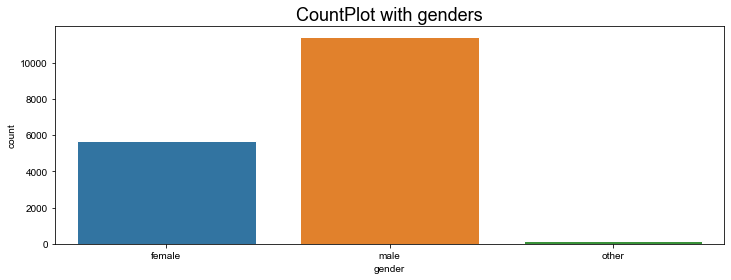

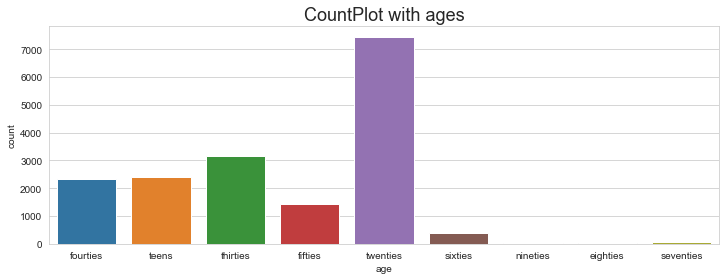

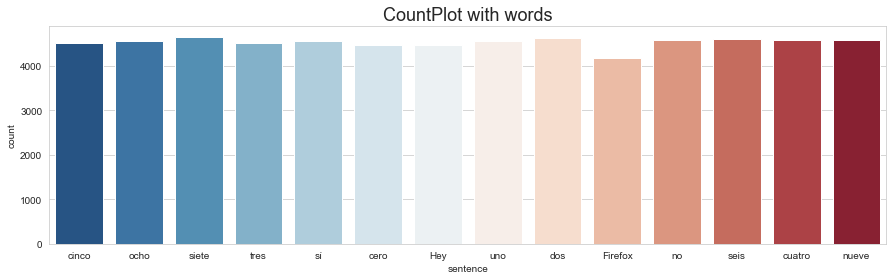

In [2]:
#load tsv in this language
es_dev = pd.read_csv('gender data/es/dev.tsv',sep='	')
es_inval = pd.read_csv('gender data/es/invalidated.tsv',sep='	')
es_other = pd.read_csv('gender data/es/other.tsv',sep='	')
es_test = pd.read_csv('gender data/es/test.tsv',sep='	')
es_train = pd.read_csv('gender data/es/train.tsv',sep='	')
es_val = pd.read_csv('gender data/es/validated.tsv',sep='	')

#keep the attributes that we need
es_dev=es_dev[['path','sentence','age','gender','locale']]
es_inval=es_dev[['path','sentence','age','gender','locale']]
es_other=es_other[['path','sentence','age','gender','locale']]
es_test=es_test[['path','sentence','age','gender','locale']]
es_train=es_train[['path','sentence','age','gender','locale']]
es_val=es_val[['path','sentence','age','gender','locale']]

#concatenation
es_concat=pd.concat([es_dev, es_inval, es_other, es_test, es_train, es_val]).drop_duplicates()

#70.038 are all the voice records - 63.496 our instances
print('Counter for values of gender:')
allLanguagesGenderCount['es'] =es_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
es_concat.index=range(len(es_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=es_concat['gender'],data=es_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=es_concat['age'],data=es_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=es_concat['sentence'],data=es_concat,palette='RdBu_r');

### 1.2. Convert mp3 files to wav
<a id="conv_sp"></a> 

In [3]:
#Create list with names of mp3 files
clips = 'gender data/es/clips/'
mp3_list = os.listdir(clips) 

#create directory for new wav clips 
es_new_clips = 'gender data/es/new_clips'
os.mkdir(es_new_clips)

#convert files to .wav - take about 4 hours to run 
for string in mp3_list:
    
    #go to source to convert mp3 files to wave files
    file = clips + string
    sound = AudioSegment.from_mp3(file)

    #convert files
    dst = es_new_clips + '/' + string[:-3] + 'wav'
    sound.export(dst, format="wav")

In [3]:
es_new_clips = 'gender data/es/new_clips'

In [4]:
#change suffixes 
es_concat.path=es_concat.path.str.replace('.mp3','.wav')

#sumarize nan values in each attribute
es_concat.isnull().sum()

path            0
sentence        0
age         46225
gender      46242
locale          0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

#drop nan values
es=es_concat.dropna()

#drop from 'gender' attribute values 'other' , because there are not many
es=es[(es!='other').all(1)]
#fix dataframe index
es.index=range(len(es))

#es=pd.get_dummies(es,columns=['gender'])
# integer encode - tranform gender to numeric attribute
label_encoder = LabelEncoder()
es.gender = label_encoder.fit_transform(es.gender)
es

path sentence       age  gender locale
0      common_voice_es_22031610.wav   cuatro  fourties       0     es
1      common_voice_es_22031616.wav      uno  fourties       0     es
2      common_voice_es_22031617.wav    cinco  fourties       0     es
3      common_voice_es_22031620.wav    nueve  fourties       0     es
4      common_voice_es_22031623.wav      Hey  fourties       0     es
...                             ...      ...       ...     ...    ...
16993  common_voice_es_21956161.wav      uno  fourties       0     es
16994  common_voice_es_21956220.wav       sí  fourties       0     es
16995  common_voice_es_21956221.wav    cinco  fourties       0     es
16996  common_voice_es_21956222.wav     ocho  fourties       0     es
16997  common_voice_es_21956223.wav    siete  fourties       0     es

[16998 rows x 5 columns]

### 1.3. Example of audio file
<a id="exam_sp"></a> 

In [6]:
#Example of audio file
import librosa
import librosa.display

#fix path
es_new_clips += '/'

#path name
fname = es_new_clips + es.path[1]

#x is a time series and sr is a sampling rate of x(default sr = 22kHz)
x , sr = librosa.load(fname,sr=48000)

# Lets play the audio 
ipd.Audio(fname)

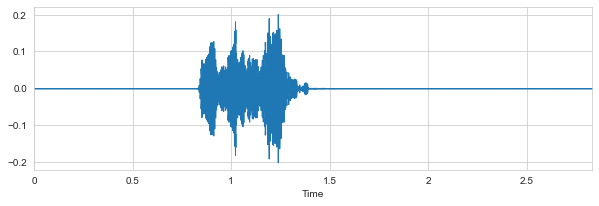

In [7]:
#display waveplot
plt.figure(figsize=(10, 3))
librosa.display.waveplot(x, sr=sr);

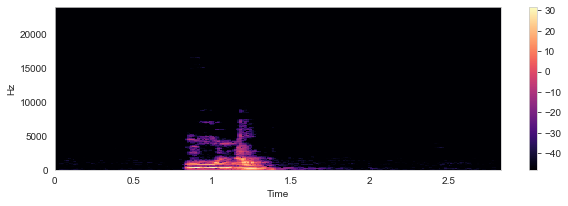

In [8]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

#plt.savefig('Spectrogram')

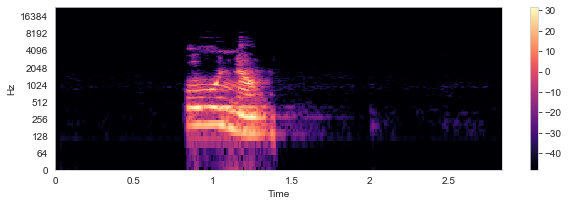

In [9]:
#print log of frequencies  
plt.figure(figsize=(10, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

In [10]:
# Example 1: short-term feature extraction
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import plotly.graph_objs as go 
import IPython 

#read audio data from file (returns sampling freq and signal as a numpy array)
fs, s = aIO.read_audio_file(fname)

# play the initial and the generated files in notebook:
print('Play file:\n')
IPython.display.display(IPython.display.Audio(fname))

# print duration in seconds:
duration = len(s) / float(fs)
print(f'Duration : {duration} seconds\n')

# extract short-term features using a 50msec non-overlapping windows
win, step = 0.1, 0.1
f, fn = aF.feature_extraction(s, fs, int(fs * win), int(fs * step))
print(f'The file has: {f.shape[1]} frames, {f.shape[0]} short-term features\n')
df = pd.DataFrame(f).transpose()
df.columns = fn
df

Play file:



Duration : 2.832 seconds

The file has: 28 frames, 68 short-term features



zcr        energy  energy_entropy  spectral_centroid  \
0   0.063763  4.172487e-08        2.893965           0.214173   
1   0.109606  4.615247e-08        3.183241           0.238267   
2   0.095645  3.135319e-08        3.279351           0.250149   
3   0.086476  3.058992e-08        3.305470           0.248643   
4   0.107314  3.254372e-08        3.301512           0.251848   
5   0.096895  3.868584e-08        3.284459           0.246816   
6   0.105022  3.438263e-08        3.282566           0.249773   
7   0.106689  3.765590e-08        3.277169           0.249119   
8   0.034591  3.031118e-02        2.321792           0.053571   
9   0.020629  4.068369e-02        2.899036           0.074213   
10  0.022088  5.602446e-02        3.137879           0.053872   
11  0.024172  5.629535e-02        3.008475           0.076158   
12  0.023963  7.227222e-02        2.963019           0.082224   
13  0.012294  1.820632e-03        2.642882           0.073874   
14  0.014170  7.920870e-06        3.183242           0.083408   
15  0.024172  1.441665e-06        3.081757           0.122176   
16  0.029173  6.005274e-07        3.290755           0.154077   
17  0.086893  1.362881e-07        3.174964           0.195717   
18  0.103146  8.832729e-08        3.221498           0.209090   
19  0.097937  2.961196e-08        3.245665           0.250064   
20  0.048135  2.880913e-07        2.473250           0.180773   
21  0.086893  3.999765e-08        3.219116           0.237312   
22  0.091269  3.238497e-08        3.269588           0.248956   
23  0.095437  3.755809e-08        3.304679           0.241261   
24  0.083767  7.628479e-08        3.150312           0.217156   
25  0.069806  6.841636e-08        3.259549           0.215835   
26  0.074807  5.826906e-08        3.279357           0.227101   
27  0.092311  3.598813e-08        3.283428           0.243990   

    spectral_spread  spectral_entropy  spectral_flux  spectral_rolloff  \
0          0.238687          0.988578       0.000000          0.175417   
1          0.253674          1.020573       0.000714          0.193750   
2          0.260010          1.064692       0.000765          0.210000   
3          0.261850          1.180207       0.000605          0.191667   
4          0.263826          1.167964       0.000498          0.197500   
5          0.263715          0.964095       0.000707          0.175833   
6          0.261646          1.145649       0.000610          0.214583   
7          0.260581          1.089953       0.000510          0.209167   
8          0.120202          0.015208       0.024160          0.018750   
9          0.160050          0.012108       0.015215          0.035417   
10         0.107189          0.010412       0.009748          0.045000   
11         0.138519          0.042286       0.014898          0.054583   
12         0.155146          0.014772       0.011054          0.050000   
13         0.166015          0.010098       0.009486          0.017500   
14         0.173238          0.021241       0.007562          0.012500   
15         0.204346          0.094074       0.008177          0.017500   
16         0.222608          0.179394       0.004058          0.021250   
17         0.241290          0.569265       0.002436          0.077500   
18         0.241206          0.791710       0.001010          0.135000   
19         0.263149          1.087892       0.000979          0.205833   
20         0.246249          0.223046       0.004965          0.035417   
21         0.259838          0.950779       0.004558          0.166667   
22         0.266051          0.933584       0.000825          0.170000   
23         0.258653          1.111279       0.000658          0.192500   
24         0.254770          0.860690       0.001030          0.141667   
25         0.255622          0.656057       0.000929          0.095000   
26         0.260177          0.728957       0.000697          0.112083   
27         0.264794          0.962819       0.00079

In [11]:
import plotly
# plot short-term energy
# create time axis in seconds
time = np.arange(0, duration - step, win) 
# get the feature whose name is 'energy'
energy = f[fn.index('energy'), :]
mylayout = go.Layout(yaxis=dict(title="frame energy value"),xaxis=dict(title="time (sec)"))
plotly.offline.iplot(go.Figure(data=[go.Scatter(x=time,y=energy)], layout=mylayout))

### 1.4. Fix length with adding silence
<a id="sil_sp"></a> 

In [12]:
#create y for our goal
y_es=es[['path','gender']]

#find max length audio in milliseconds
max=0
for i in y_es.path:
    p = es_new_clips + i
    if os.path.exists(p):
        fs, s = aIO.read_audio_file(p)
        duration = len(s) / float(fs)
        if duration>max:
            max=duration
max

12.096

In [13]:
# Add here the fix length (in milliseconds)
es_pad_ms = 12096

#create directory for new wav clips
es_sil_clips = 'gender data/es/sil_clips'
os.mkdir(es_sil_clips)
es_sil_clips += '/'

for i in y_es.path:
    p = es_new_clips + i
    if os.path.exists(p):
        audio = AudioSegment.from_wav(p)
        
        # Adding silence after the audio
        silence = AudioSegment.silent(duration=es_pad_ms-len(audio)+1)
        padded = audio + silence  
        
        # Add new path and name
        new_name = es_sil_clips + i 
        padded.export(new_name, format='wav')

### 1.5. Features extraction from audio data
<a id="fextr_sp"></a> 

In [13]:
y_es=es[['path','gender']]
es_sil_clips = 'gender data/es/sil_clips/'

In [14]:
#short-term feature extraction
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import IPython

#create list to add our clips features
data_es = []

#loop feature extraction over the entire dataset
for i in y_es.path:
    p = es_sil_clips + i
    if os.path.exists(p):
        # read audio data from file 
        # (returns sampling freq and signal as a numpy array)
        fs, s = aIO.read_audio_file(p)
        # extract short-term features using a 177msec non-overlapping windows
        win, step = 0.177, 0.177
        f, fn = aF.feature_extraction(s, fs, int(fs * win), int(fs * step))
        data_es.append(f.transpose().tolist())

print('data shape:', np.array(data_es).shape)

data shape: (16998, 68, 68)


### 1.6. Undersampling and scaling
<a id="under_sp"></a> 

In [15]:
#create X and for our model and reshape X for undersampling the gender attribute
X_es = np.array(data_es).reshape(16998, -1)
y_es = y_es.gender.to_numpy()

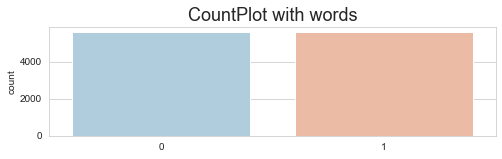

In [16]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)

# transform the dataset
X_es, y_es = undersample.fit_resample(X_es, y_es)

#plot with count number of words that people say
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y_es, palette='RdBu_r');

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Scaling in our data points before splitting
scaler = MinMaxScaler()
X_es = scaler.fit_transform(X_es)

X_es.shape

(11196, 4624)

In [18]:
# reshape our data for cnn input
X_es = X_es.reshape(11196, 68, 68, 1)

X_es.shape

(11196, 68, 68, 1)

### 1.7. Split data and create model
<a id="model_sp"></a> 

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_es, y_es, test_size = 0.3, random_state = 9)

In [164]:
import tensorflow as tf
import keras
from keras.models import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam

# define model cnn
def Cnn_binary(size):
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(size,size,1), activation='relu', padding='same'))
    model.add(BatchNormalization())
    ##model.add(LeakyReLU(alpha=0.2))
    model.add(MaxPooling2D((2, 2)))
    ##model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    ##model.add(LeakyReLU(alpha=0.2)) 
    model.add(MaxPooling2D((2, 2)))
    ##model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    ##model.add(LeakyReLU(alpha=0.2)) 
    model.add(MaxPooling2D((2, 2)))
    ##model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    ##model.add(LeakyReLU(alpha=0.2)) 
    model.add(MaxPooling2D((2, 2)))
    ##model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    ##model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    ##model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # For a binary classification problem
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [165]:
#call model
model = Cnn_binary(68)

# simple early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)

In [166]:
# Here we can see parameters and output shapes in each layer
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 68, 68, 16)        160       
_________________________________________________________________
batch_normalization_21 (Batc (None, 68, 68, 16)        64        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 32)        4640      
_________________________________________________________________
batch_normalization_22 (Batc (None, 34, 34, 32)        128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 17, 17, 64)       

In [167]:
# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 25, 
          verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop])

Epoch 1/25
245/245 [==============================] - 49s 185ms/step - loss: 0.6459 - accuracy: 0.6187 - val_loss: 0.8568 - val_accuracy: 0.5180
Epoch 2/25
245/245 [==============================] - 37s 151ms/step - loss: 0.3578 - accuracy: 0.8576 - val_loss: 0.4141 - val_accuracy: 0.8398
Epoch 3/25
245/245 [==============================] - 47s 193ms/step - loss: 0.2953 - accuracy: 0.8829 - val_loss: 0.3580 - val_accuracy: 0.8529
Epoch 4/25
245/245 [==============================] - 44s 179ms/step - loss: 0.2625 - accuracy: 0.8987 - val_loss: 0.3710 - val_accuracy: 0.8449
Epoch 5/25
245/245 [==============================] - 46s 187ms/step - loss: 0.2541 - accuracy: 0.9040 - val_loss: 0.3553 - val_accuracy: 0.8559
Epoch 6/25
245/245 [==============================] - 43s 174ms/step - loss: 0.2297 - accuracy: 0.9111 - val_loss: 0.3889 - val_accuracy: 0.8401
Epoch 7/25
245/245 [==============================] - 42s 170ms/step - loss: 0.2073 - accuracy: 0.9209 - val_loss: 0.3307 - val_ac

### 1.8. Results
<a id="res_sp"></a> 

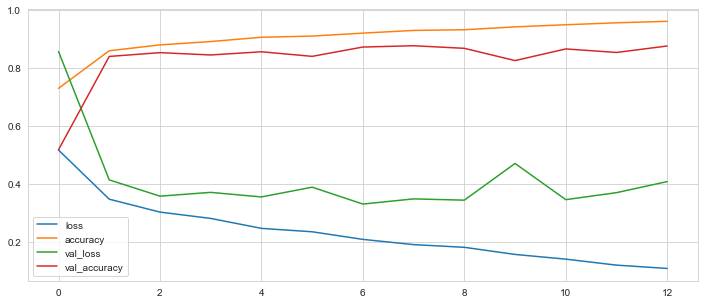

In [168]:
# model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,5));

In [169]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0 )

print("Train loss: ", training_score[0])
print("Validation loss: ", test_score[0])
print("Train accuracy: ", training_score[1])
print("Test accuracy: ", test_score[1])

Train loss:  0.06875327974557877
Validation loss:  0.40825459361076355
Train accuracy:  0.9747352600097656
Test accuracy:  0.8758559226989746


In [171]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

predictions = model.predict_classes(X_test)
print('classification report:\n',classification_report(y_test,predictions, target_names=['female','male']))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

classification report:
               precision    recall  f1-score   support

      female       0.86      0.88      0.87      1619
        male       0.89      0.87      0.88      1740

    accuracy                           0.88      3359
   macro avg       0.88      0.88      0.88      3359
weighted avg       0.88      0.88      0.88      3359

confusion matrix:
 [[1429  190]
 [ 227 1513]]


In [172]:
def pred(y_test,pred):
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test,pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test,pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test,pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test,pred)
    print('F1 score: %f' % f1)
    # ROC AUC
    auc = roc_auc_score(y_test,pred)
    print('ROC AUC: %f' % auc)
    
#call function with scores
pred(y_test,predictions)

Accuracy: 0.875856
Precision: 0.888432
Recall: 0.869540
F1 score: 0.878885
ROC AUC: 0.876092


In [173]:
from tensorflow.keras.models import load_model

# creates a HDF5 file to save the model
model.save('voice_gender.h5')

### 1.9. Create spectrograms
<a id="spec_sp"></a> 

In [138]:
p= es_sil_clips + es.path[100]
fs, s = aIO.read_audio_file(p)
# extract spectrogram using a 216msec non-overlapping windows
win, step = 0.02245, 0.02245
specgram, time_axis, freq_axis = aF.spectrogram(s, fs, int(fs * win), int(fs * step))

(538, 538)


In [1]:
#function fo spectrograms
def spectrogram(num,df,path):
    #create list to add our clips features
    spec_data = []
    
    #loop feature extraction over the entire dataset
    for i in df:
        p = path + i
        if os.path.exists(p):
            # read audio data from file 
            # (returns sampling freq and signal as a numpy array)
            fs, s = aIO.read_audio_file(p)
            # extract spectrogram using a 216msec non-overlapping windows
            win, step = num, num
            specgram = aF.spectrogram(s, fs, int(fs * win), int(fs * step))  
            spec_data.append(specgram[0].tolist())
            
    print('data shape:', np.array(spec_data).shape)
    return np.array(spec_data)

spec_data = spectrogram(0.02245,es.path,es_sil_clips)

NameError: name 'es' is not defined

### 1.10. Preparing spec data
<a id="pr_spec_sp"></a> 

In [ ]:
# create X and for our model and reshape X for undersampling the gender attribute
X_es_sp = spec_data.reshape(spec_data.shape[0], -1)
y_es_sp = es.gender.to_numpy()

# transform the dataset with undersampling
X_es_sp, y_es_sp = undersample.fit_resample(X_es_sp, y_es_sp)

# plot with count number of words that people say
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y_es_sp, palette='RdBu_r');

In [ ]:
# Scaling in our data points before splitting
X_es_sp = scaler.fit_transform(X_es_sp)

X_es_sp.shape

In [ ]:
# reshape our data for cnn input
X_es_sp = X_es_sp.reshape(X_es_sp[0], 68, 68, 1)

X_es_sp.shape

### 1.11. Run model for spectograms and results
<a id="model_spec_es"></a> 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_es_sp, y_es_sp, test_size = 0.3, random_state = 9)

In [ ]:
#call model
model = Cnn_binary(68)

# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 25, 
          verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop])

In [ ]:
# model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,5));

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0 )

print("Train loss: ", training_score[0])
print("Validation loss: ", test_score[0])
print("Train accuracy: ", training_score[1])
print("Test accuracy: ", test_score[1])

In [ ]:
predictions = model.predict_classes(X_test)
print('classification report:\n',classification_report(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

In [ ]:
#call function with scores
pred(y_test,predictions)

## 2. English
<a id="English"></a> 

### 2.1. Dataset and counplots
<a id="data_en"></a>

Counter for values:
           es     en
NaN     46242  27274
male    11423  13485
female   5655   4098
other     176    442


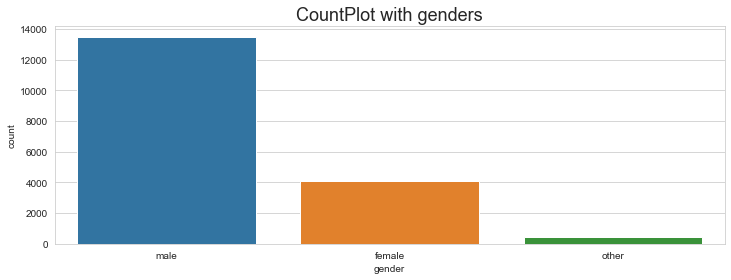

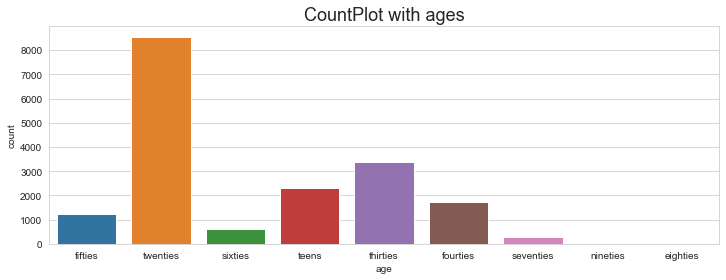

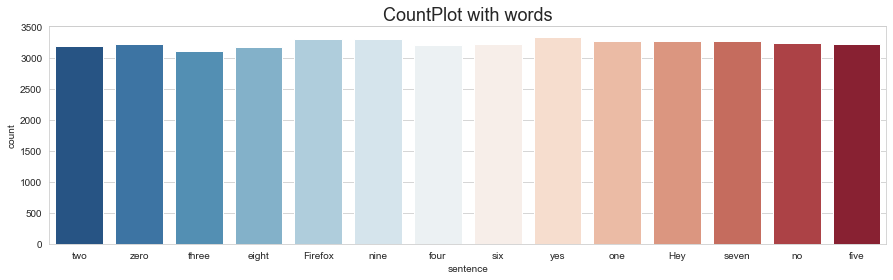

In [29]:
#load tsv in this language
en_dev = pd.read_csv('gender data/en/dev.tsv',sep='	')
en_inval = pd.read_csv('gender data/en/invalidated.tsv',sep='	')
en_other = pd.read_csv('gender data/en/other.tsv',sep='	')
en_test = pd.read_csv('gender data/en/test.tsv',sep='	')
en_train = pd.read_csv('gender data/en/train.tsv',sep='	')
en_val = pd.read_csv('gender data/en/validated.tsv',sep='	')

#keep the attributes that we need
en_dev=en_dev[['path','sentence','age','gender','locale']]
en_inval=en_dev[['path','sentence','age','gender','locale']]
en_other=en_other[['path','sentence','age','gender','locale']]
en_test=en_test[['path','sentence','age','gender','locale']]
en_train=en_train[['path','sentence','age','gender','locale']]
en_val=en_val[['path','sentence','age','gender','locale']]

#concatenation of datasets
en_concat=pd.concat([en_dev, en_inval, en_other, en_test, en_train, en_val]).drop_duplicates()

#49.370 are all the voice records - 45.299 our instances
print('Counter for values:')
allLanguagesGenderCount['en'] =en_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
en_concat.index=range(len(en_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=en_concat['gender'],data=en_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=en_concat['age'],data=en_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=en_concat['sentence'],data=en_concat,palette='RdBu_r');

### 2.2. Convert mp3 to wav
<a id="conv_en"></a>

In [30]:
#Create list with names of mp3 files
clips = 'gender data/en/clips/'
mp3_list = os.listdir(clips) 

#create directory for new wav clips 
en_new_clips = 'gender data/en/new_clips'
os.mkdir(en_new_clips)

#convert files to .wav - take about 4 hours to run 
for string in mp3_list:
    
    #go to source to convert mp3 files to wave files
    file = clips + string
    sound = AudioSegment.from_mp3(file)

    #convert files
    dst = en_new_clips + '/' + string[:-3] + 'wav'
    sound.export(dst, format="wav")

In [ ]:
en_new_clips = 'gender data/en/new_clips'

In [31]:
#change suffixes 
en_concat.path=en_concat.path.str.replace('.mp3','.wav')

#sumarize nan values in each attribute
en_concat.isnull().sum()

path            0
sentence        0
age         27200
gender      27274
locale          0
dtype: int64

In [32]:
#drop nan values
en=en_concat.dropna()

#drop from 'gender' attribute values 'other' , because there are not many
en=en[(en!='other').all(1)]
#fix dataframe index
en.index=range(len(en))

#en=pd.get_dummies(en,columns=['gender'])
# integer encode - tranform gender to numeric attribute
label_encoder = LabelEncoder()
en.gender = label_encoder.fit_transform(en.gender)
en

path sentence      age  gender locale
0      common_voice_en_22173837.wav      two  fifties       1     en
1      common_voice_en_22173838.wav      one  fifties       1     en
2      common_voice_en_22173839.wav      six  fifties       1     en
3      common_voice_en_22173840.wav     nine  fifties       1     en
4      common_voice_en_22173841.wav     zero  fifties       1     en
...                             ...      ...      ...     ...    ...
17390  common_voice_en_21928717.wav     nine    teens       0     en
17391  common_voice_en_21928723.wav     four    teens       0     en
17392  common_voice_en_21928724.wav    three    teens       0     en
17393  common_voice_en_21928725.wav      two    teens       0     en
17394  common_voice_en_21928726.wav     zero    teens       0     en

[17395 rows x 5 columns]

### 2.3. Example of audio file
<a id="exam_en"></a> 

In [33]:
#Example of audio file
#fix path
en_new_clips += '/'

#path name
fname = en_new_clips + en.path[1]

#x is a time series and sr is a sampling rate of x(default sr = 22kHz)
x , sr = librosa.load(fname,sr=48000)

# Lets play the audio 
ipd.Audio(fname)

### 2.4. Fix length with adding silence
<a id="sil_en"></a> 

In [34]:
#create y for our goal
y_en=en[['path','gender']]

#find max length audio in milliseconds
max=0
for i in y_en.path:
    p = en_new_clips + i
    if os.path.exists(p):
        fs, s = aIO.read_audio_file(p)
        duration = len(s) / float(fs)
        if duration>max:
            max=duration
max

14.736

In [35]:
# Add here the fix length (in milliseconds)
en_pad_ms = 14736

#create directory for new wav clips
en_sil_clips = 'gender data/en/sil_clips'
os.mkdir(en_sil_clips)
en_sil_clips += '/'

for i in y_en.path:
    p = en_new_clips + i
    if os.path.exists(p):
        audio = AudioSegment.from_wav(p)
        
        # Adding silence after the audio
        silence = AudioSegment.silent(duration=en_pad_ms-len(audio)+1)
        padded = audio + silence  
        
        # Add new path and name
        new_name = en_sil_clips + i 
        padded.export(new_name, format='wav')

### 2.5. Features extraction from audio data
<a id="fextr_en"></a> 

In [37]:
#short-term feature extraction
#create list to add our clips features
data_en = []

#loop feature extraction over the entire dataset
for i in y_en.path:
    p = en_sil_clips + i
    if os.path.exists(p):
        # read audio data from file 
        # (returns sampling freq and signal as a numpy array)
        fs, s = aIO.read_audio_file(p)
        # extract short-term features using a 216msec non-overlapping windows
        win, step = 0.216, 0.216
        f, fn = aF.feature_extraction(s, fs, int(fs * win), int(fs * step))
        data_en.append(f.transpose().tolist())

print('data shape:', np.array(data_en).shape)

data shape: (17395, 68, 68)


### 2.6. Undersampling and scaling
<a id="under_en"></a> 

In [38]:
#create X and for our model and reshape X for undersampling the gender attribute
X_en = np.array(data_en).reshape(17395, -1)
y_en = y_en.gender.to_numpy()

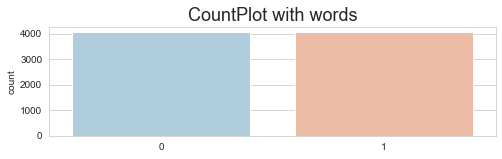

In [39]:
# transform the dataset
X_en, y_en = undersample.fit_resample(X_en, y_en)

#plot with count number of words that people say
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y_en, palette='RdBu_r');

In [40]:
# Scaling in our data points before splitting
X_en = scaler.fit_transform(X_en)

X_en.shape

(8114, 4624)

In [41]:
# reshape our data for cnn input
X_en = X_en.reshape(8114, 68, 68, 1)

X_en.shape

(8114, 68, 68, 1)

### 2.7. Split data and results
<a id="res_en"></a> 

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_en, y_en, test_size = 0.3, random_state = 10)

In [175]:
#call model
model = Cnn_binary(68)

# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 25, 
          verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop])

Epoch 1/25
178/178 [==============================] - 40s 213ms/step - loss: 0.8013 - accuracy: 0.5344 - val_loss: 0.9088 - val_accuracy: 0.4916
Epoch 2/25
178/178 [==============================] - 39s 219ms/step - loss: 0.4658 - accuracy: 0.7932 - val_loss: 1.6307 - val_accuracy: 0.4916
Epoch 3/25
178/178 [==============================] - 32s 182ms/step - loss: 0.3774 - accuracy: 0.8382 - val_loss: 1.4595 - val_accuracy: 0.4953
Epoch 4/25
178/178 [==============================] - 33s 188ms/step - loss: 0.3764 - accuracy: 0.8412 - val_loss: 0.3712 - val_accuracy: 0.8595
Epoch 5/25
178/178 [==============================] - 34s 188ms/step - loss: 0.3004 - accuracy: 0.8762 - val_loss: 0.3486 - val_accuracy: 0.8579
Epoch 6/25
178/178 [==============================] - 34s 191ms/step - loss: 0.2686 - accuracy: 0.8885 - val_loss: 0.3751 - val_accuracy: 0.8308
Epoch 7/25
178/178 [==============================] - 36s 202ms/step - loss: 0.2600 - accuracy: 0.8896 - val_loss: 0.6256 - val_ac

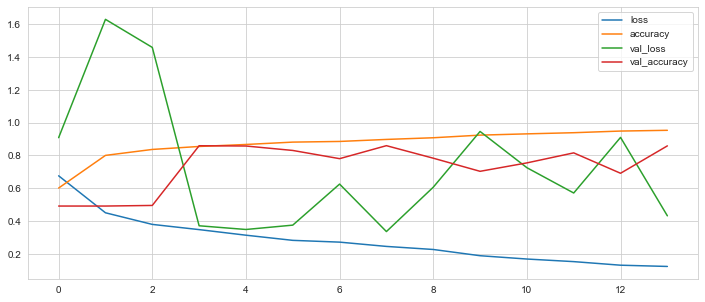

In [176]:
# model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,5));

In [177]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0 )

print("Train loss: ", training_score[0])
print("Validation loss: ", test_score[0])
print("Train accuracy: ", training_score[1])
print("Test accuracy: ", test_score[1])

Train loss:  0.09232906997203827
Validation loss:  0.43196532130241394
Train accuracy:  0.9697129726409912
Test accuracy:  0.8587269186973572


In [178]:
predictions = model.predict_classes(X_test)
print('classification report:\n',classification_report(y_test,predictions, target_names=['female','male']))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

classification report:
               precision    recall  f1-score   support

      female       0.89      0.82      0.85      1238
        male       0.83      0.90      0.86      1197

    accuracy                           0.86      2435
   macro avg       0.86      0.86      0.86      2435
weighted avg       0.86      0.86      0.86      2435

confusion matrix:
 [[1014  224]
 [ 120 1077]]


In [179]:
#call function with scores
pred(y_test,predictions)

Accuracy: 0.858727
Precision: 0.827825
Recall: 0.899749
F1 score: 0.862290
ROC AUC: 0.859406


### 2.8. Create and prepare spectrograms
<a id="spec_en"></a> 

In [ ]:
# create spectrograms
spec_data = spectrogram(0.02245,en.path,en_sil_clips)

# create X and for our model and reshape X for undersampling the gender attribute
X_en_sp = spec_data.reshape(spec_data.shape[0], -1)
y_en_sp = en.gender.to_numpy()

# transform the dataset with undersampling
X_en_sp, y_en_sp = undersample.fit_resample(X_en_sp, y_en_sp)

# plot with count number of words that people say
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y_en_sp, palette='RdBu_r');

In [ ]:
# Scaling in our data points before splitting
X_en_sp = scaler.fit_transform(X_en_sp)

X_en_sp.shape

In [ ]:
# reshape our data for cnn input
X_en_sp = X_en_sp.reshape(X_en_sp[0], 68, 68, 1)

X_en_sp.shape

### 2.9. Run model for spectograms and results
<a id="model_spec_en"></a> 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_en_sp, y_en_sp, test_size = 0.3, random_state = 9)

In [ ]:
#call model
model = Cnn_binary(68)

# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 25, 
          verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop])

In [ ]:
# model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,5));

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0 )

print("Train loss: ", training_score[0])
print("Validation loss: ", test_score[0])
print("Train accuracy: ", training_score[1])
print("Test accuracy: ", test_score[1])

In [ ]:
predictions = model.predict_classes(X_test)
print('classification report:\n',classification_report(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

In [ ]:
#call function with scores
pred(y_test,predictions)

## 3. French
<a id="French"></a> 

### 3.1. Dataset and counplots
<a id="data_fr"></a>

Counter for values:
           es     en     fr
NaN     46242  27274  13723
male    11423  13485   4952
female   5655   4098   1231
other     176    442    131


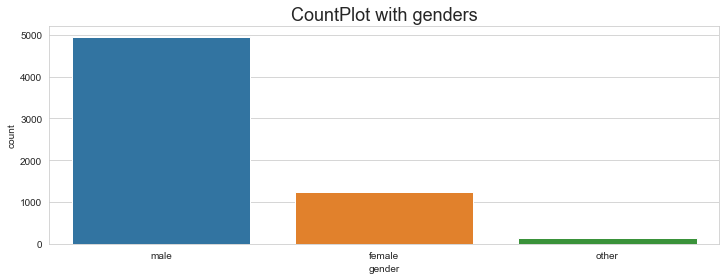

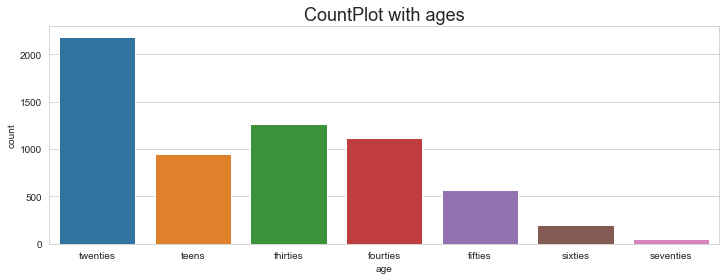

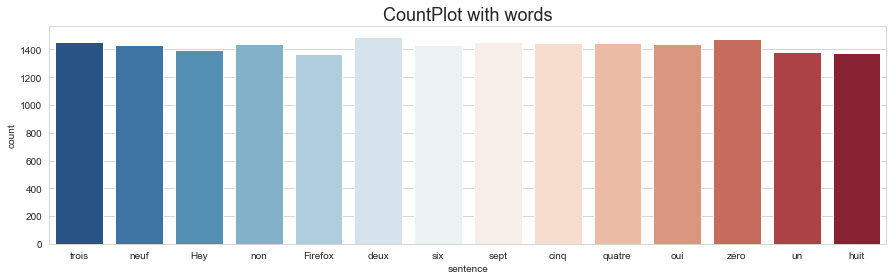

In [49]:
#load tsv in this language
fr_dev = pd.read_csv('gender data/fr/dev.tsv',sep='	')
fr_inval = pd.read_csv('gender data/fr/invalidated.tsv',sep='	')
fr_other = pd.read_csv('gender data/fr/other.tsv',sep='	')
fr_test = pd.read_csv('gender data/fr/test.tsv',sep='	')
fr_train = pd.read_csv('gender data/fr/train.tsv',sep='	')
fr_val = pd.read_csv('gender data/fr/validated.tsv',sep='	')

#keep the attributes that we need
fr_dev=fr_dev[['path','sentence','age','gender','locale']]
fr_inval=fr_dev[['path','sentence','age','gender','locale']]
fr_other=fr_other[['path','sentence','age','gender','locale']]
fr_test=fr_test[['path','sentence','age','gender','locale']]
fr_train=fr_train[['path','sentence','age','gender','locale']]
fr_val=fr_val[['path','sentence','age','gender','locale']]

#concatenation
fr_concat=pd.concat([fr_dev, fr_inval, fr_other, fr_test, fr_train, fr_val]).drop_duplicates()

#22.382 are all the voice records - 20.037 our instances
print('Counter for values:')
allLanguagesGenderCount['fr'] =fr_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
fr_concat.index=range(len(fr_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fr_concat['gender'],data=fr_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fr_concat['age'],data=fr_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fr_concat['sentence'],data=fr_concat,palette='RdBu_r');

### 3.2. Convert mp3 to wav
<a id="conv_fr"></a>

In [51]:
#Create list with names of mp3 files
clips = 'gender data/fr/clips/'
mp3_list = os.listdir(clips)

#create directory for new wav clips 
fr_new_clips = 'gender data/fr/new_clips'
os.mkdir(fr_new_clips)

#convert files to .wav - take about 4 hours to run 
for string in mp3_list:
    
    #go to source to convert mp3 files to wave files
    file = clips + string
    sound = AudioSegment.from_mp3(file)

    #convert files
    dst = fr_new_clips + '/' + string[:-3] + 'wav'
    sound.export(dst, format="wav")

In [255]:
fr_new_clips = 'gender data/fr/new_clips'

In [52]:
#change suffixes 
fr_concat.path=fr_concat.path.str.replace('.mp3','.wav')

#sumarize nan values in each attribute
fr_concat.isnull().sum()

path            0
sentence        0
age         13704
gender      13723
locale          0
dtype: int64

In [53]:
#drop nan values
fr=fr_concat.dropna()

#drop from 'gender' attribute values 'other' , because there are not many
fr=fr[(fr!='other').all(1)]
#fix dataframe index
fr.index=range(len(fr))

#fr=pd.get_dummies(fr,columns=['gender'])
# integer encode - tranform gender to numeric attribute
label_encoder = LabelEncoder()
fr.gender = label_encoder.fit_transform(fr.gender)
fr

path sentence       age  gender locale
0     common_voice_fr_22024061.wav    trois  twenties       1     fr
1     common_voice_fr_22024062.wav     neuf  twenties       1     fr
2     common_voice_fr_22024064.wav      Hey  twenties       1     fr
3     common_voice_fr_22024073.wav      non  twenties       1     fr
4     common_voice_fr_22024074.wav  Firefox  twenties       1     fr
...                            ...      ...       ...     ...    ...
6155  common_voice_fr_22380530.wav   quatre     teens       1     fr
6156  common_voice_fr_22380532.wav      oui     teens       1     fr
6157  common_voice_fr_22380533.wav     deux     teens       1     fr
6158  common_voice_fr_22380534.wav  Firefox     teens       1     fr
6159  common_voice_fr_22380535.wav     huit     teens       1     fr

[6160 rows x 5 columns]

### 3.3. Example of audio file
<a id="exam_fr"></a> 

In [55]:
#Example of audio file
#fix path
fr_new_clips += '/'

#path name
fname = fr_new_clips + fr.path[1]

#x is a time series and sr is a sampling rate of x(default sr = 22kHz)
x , sr = librosa.load(fname,sr=48000)

# Lets play the audio 
ipd.Audio(fname)

### 3.4. Fix length with adding silence
<a id="sil_fr"></a> 

In [56]:
#create y for our goal
y_fr=fr[['path','gender']]

#find max length audio in milliseconds
max=0
for i in y_fr.path:
    p = fr_new_clips + i
    if os.path.exists(p):
        fs, s = aIO.read_audio_file(p)
        duration = len(s) / float(fs)
        if duration>max:
            max=duration
max

9.384

In [57]:
# Add here the fix length (in milliseconds)
fr_pad_ms = 9384

#create directory for new wav clips
fr_sil_clips = 'gender data/fr/sil_clips'
os.mkdir(fr_sil_clips)
fr_sil_clips += '/'

for i in y_fr.path:
    p = fr_new_clips + i
    if os.path.exists(p):
        audio = AudioSegment.from_wav(p)
        
        # Adding silence after the audio
        silence = AudioSegment.silent(duration=fr_pad_ms-len(audio)+1)
        padded = audio + silence  
        
        # Add new path and name
        new_name = fr_sil_clips + i 
        padded.export(new_name, format='wav')

### 3.5. Features extraction from audio data
<a id="fextr_fr"></a> 

In [58]:
#short-term feature extraction
#create list to add our clips features
data_fr = []

#loop feature extraction over the entire dataset
for i in y_fr.path:
    p = fr_sil_clips + i
    if os.path.exists(p):
        # read audio data from file 
        # (returns sampling freq and signal as a numpy array)
        fs, s = aIO.read_audio_file(p)
        # extract short-term features using a 138msec non-overlapping windows
        win, step = 0.138, 0.138
        f, fn = aF.feature_extraction(s, fs, int(fs * win), int(fs * step))
        data_fr.append(f.transpose().tolist())

print('data shape:', np.array(data_fr).shape)

data shape: (6160, 68, 68)


### 3.6. Undersampling and scaling
<a id="under_fr"></a> 

In [59]:
#create X and for our model and reshape X for undersampling the gender attribute
X_fr = np.array(data_fr).reshape(6160, -1)
y_fr = y_fr.gender.to_numpy()

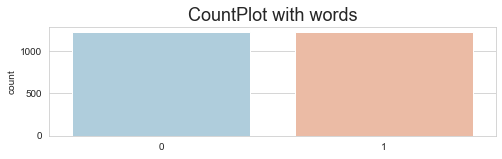

In [60]:
# transform the dataset
X_fr, y_fr = undersample.fit_resample(X_fr, y_fr)

#plot with count number of words that people say
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y_fr, palette='RdBu_r');

In [61]:
# Scaling in our data points before splitting
X_fr = scaler.fit_transform(X_fr)

X_fr.shape

(2444, 4624)

In [62]:
# reshape our data for cnn input
X_fr = X_fr.reshape(2444, 68, 68, 1)

X_fr.shape

(2444, 68, 68, 1)

### 3.7. Split data and results
<a id="res_fr"></a> 

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_fr, y_fr, test_size = 0.3, random_state = 10)

In [181]:
#call model
model = Cnn_binary(68)

# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 25, 
          verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop])

Epoch 1/25
54/54 [==============================] - 15s 235ms/step - loss: 0.7950 - accuracy: 0.5119 - val_loss: 0.7450 - val_accuracy: 0.5177
Epoch 2/25
54/54 [==============================] - 11s 203ms/step - loss: 0.6303 - accuracy: 0.6206 - val_loss: 0.7117 - val_accuracy: 0.5177
Epoch 3/25
54/54 [==============================] - 15s 283ms/step - loss: 0.5110 - accuracy: 0.7400 - val_loss: 0.6917 - val_accuracy: 0.5177
Epoch 4/25
54/54 [==============================] - 10s 185ms/step - loss: 0.2966 - accuracy: 0.8850 - val_loss: 0.6831 - val_accuracy: 0.5763
Epoch 5/25
54/54 [==============================] - 10s 187ms/step - loss: 0.2984 - accuracy: 0.8713 - val_loss: 0.9100 - val_accuracy: 0.4823
Epoch 6/25
54/54 [==============================] - 12s 216ms/step - loss: 0.2740 - accuracy: 0.8917 - val_loss: 1.0842 - val_accuracy: 0.4823
Epoch 7/25
54/54 [==============================] - 12s 230ms/step - loss: 0.1633 - accuracy: 0.9406 - val_loss: 1.4130 - val_accuracy: 0.4823

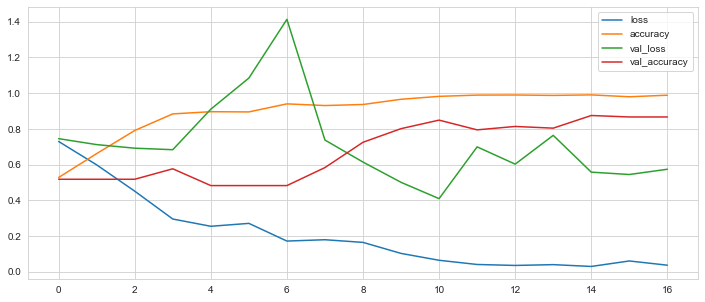

In [182]:
# model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,5));

In [183]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0 )

print("Train loss: ", training_score[0])
print("Validation loss: ", test_score[0])
print("Train accuracy: ", training_score[1])
print("Test accuracy: ", test_score[1])

Train loss:  0.01569499261677265
Validation loss:  0.57378089427948
Train accuracy:  0.9953216314315796
Test accuracy:  0.8664849996566772


In [184]:
predictions = model.predict_classes(X_test)
print('classification report:\n',classification_report(y_test,predictions, target_names=['female','male']))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

classification report:
               precision    recall  f1-score   support

      female       0.85      0.91      0.88       380
        male       0.89      0.82      0.86       354

    accuracy                           0.87       734
   macro avg       0.87      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734

confusion matrix:
 [[344  36]
 [ 62 292]]


In [185]:
#call function with scores
pred(y_test,predictions)

Accuracy: 0.866485
Precision: 0.890244
Recall: 0.824859
F1 score: 0.856305
ROC AUC: 0.865061


### 3.8. Create and prepare spectrograms
<a id="spec_fr"></a> 

In [ ]:
# create spectrograms
spec_data = spectrogram(0.02245,fr.path,fr_sil_clips)

# create X and for our model and reshape X for undersampling the gender attribute
X_fr_sp = spec_data.reshape(spec_data.shape[0], -1)
y_fr_sp = fr.gender.to_numpy()

# transform the dataset with undersampling
X_fr_sp, y_fr_sp = undersample.fit_resample(X_fr_sp, y_fr_sp)

# plot with count number of words that people say
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y_fr_sp, palette='RdBu_r');

In [ ]:
# Scaling in our data points before splitting
X_fr_sp = scaler.fit_transform(X_fr_sp)

X_fr_sp.shape

In [ ]:
# reshape our data for cnn input
X_fr_sp = X_fr_sp.reshape(X_fr_sp[0], 68, 68, 1)

X_fr_sp.shape

### 3.9. Run model for spectograms and results
<a id="model_spec_fr"></a> 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fr_sp, y_fr_sp, test_size = 0.3, random_state = 9)

In [ ]:
#call model
model = Cnn_binary(68)

# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 25, 
          verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop])

In [ ]:
# model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,5));

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0 )

print("Train loss: ", training_score[0])
print("Validation loss: ", test_score[0])
print("Train accuracy: ", training_score[1])
print("Test accuracy: ", test_score[1])

In [ ]:
predictions = model.predict_classes(X_test)
print('classification report:\n',classification_report(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

In [ ]:
#call function with scores
pred(y_test,predictions)

## 4. German
<a id="German"></a> 

### 4.1. Dataset and counplots
<a id="data_de"></a>

Counter for values:
           es     en     fr    de
NaN     46242  27274  13723  8513
male    11423  13485   4952  4345
female   5655   4098   1231   802
other     176    442    131    44


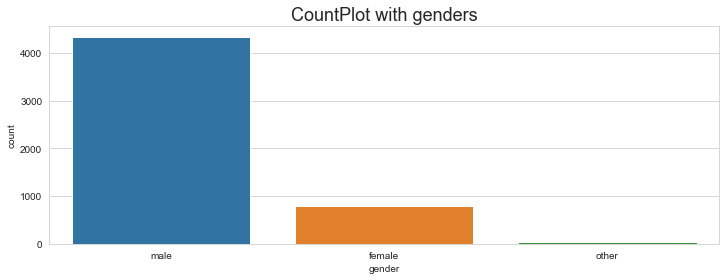

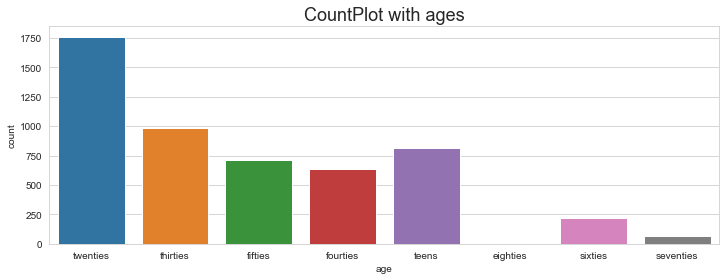

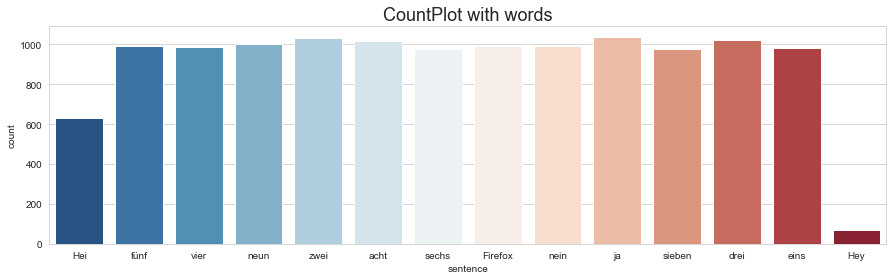

In [69]:
#load tsv in this language
de_dev = pd.read_csv('gender data/de/dev.tsv',sep='	')
de_inval = pd.read_csv('gender data/de/invalidated.tsv',sep='	')
de_other = pd.read_csv('gender data/de/other.tsv',sep='	')
de_test = pd.read_csv('gender data/de/test.tsv',sep='	')
de_train = pd.read_csv('gender data/de/train.tsv',sep='	')
de_val = pd.read_csv('gender data/de/validated.tsv',sep='	')

#keep the attributes that we need
de_dev=de_dev[['path','sentence','age','gender','locale']]
de_inval=de_dev[['path','sentence','age','gender','locale']]
de_other=de_other[['path','sentence','age','gender','locale']]
de_test=de_test[['path','sentence','age','gender','locale']]
de_train=de_train[['path','sentence','age','gender','locale']]
de_val=de_val[['path','sentence','age','gender','locale']]

#concatenation
de_concat=pd.concat([de_dev, de_inval, de_other, de_test, de_train, de_val]).drop_duplicates()

#15.090 are all the voice records - 13.704 our instances
print('Counter for values:')
allLanguagesGenderCount['de'] =de_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
de_concat.index=range(len(de_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=de_concat['gender'],data=de_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=de_concat['age'],data=de_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=de_concat['sentence'],data=de_concat,palette='RdBu_r');

### 4.2. Convert mp3 to wav
<a id="conv_de"></a>

In [71]:
#Create list with names of mp3 files
clips = 'gender data/de/clips/'
mp3_list = os.listdir(clips) 

#create directory for new wav clips 
de_new_clips = 'gender data/de/new_clips'
os.mkdir(de_new_clips)

#convert files to .wav - take about 4 hours to run 
for string in mp3_list:
    
    #go to source to convert mp3 files to wave files
    file = clips + string
    sound = AudioSegment.from_mp3(file)

    #convert files
    dst = de_new_clips + '/' + string[:-3] + 'wav'
    sound.export(dst, format="wav")

In [260]:
de_new_clips = 'gender data/de/new_clips'

In [72]:
#change suffixes 
de_concat.path=de_concat.path.str.replace('.mp3','.wav')

#sumarize nan values in each attribute
de_concat.isnull().sum()

path           0
sentence     979
age         8498
gender      8513
locale         0
dtype: int64

In [73]:
#drop nan values
de=de_concat.dropna()

#drop from 'gender' attribute values 'other' , because there are not many
de=de[(de!='other').all(1)]
#fix dataframe index
de.index=range(len(de))

#de=pd.get_dummies(de,columns=['gender'])
# integer encode - tranform gender to numeric attribute
label_encoder = LabelEncoder()
de.gender = label_encoder.fit_transform(de.gender)
de

path sentence       age  gender locale
0     common_voice_de_21897363.wav  Firefox  twenties       1     de
1     common_voice_de_21897364.wav     acht  twenties       1     de
2     common_voice_de_21897365.wav     nein  twenties       1     de
3     common_voice_de_21897366.wav       ja  twenties       1     de
4     common_voice_de_21897367.wav     vier  twenties       1     de
...                            ...      ...       ...     ...    ...
4746  common_voice_de_21916843.wav     vier   fifties       1     de
4747  common_voice_de_21916844.wav     zwei   fifties       1     de
4748  common_voice_de_21916845.wav   sieben   fifties       1     de
4749  common_voice_de_21916846.wav      Hei   fifties       1     de
4750  common_voice_de_23887746.wav      Hey   fifties       1     de

[4751 rows x 5 columns]

### 4.3. Example of audio file
<a id="exam_de"></a> 

In [74]:
#Example of audio file
#fix path
de_new_clips += '/'

#path name
fname = de_new_clips + de.path[10]

#x is a time series and sr is a sampling rate of x(default sr = 22kHz)
x , sr = librosa.load(fname,sr=48000)

# Lets play the audio 
ipd.Audio(fname)

### 4.4. Fix length with adding silence
<a id="sil_de"></a> 

In [75]:
#create y for our goal
y_de=de[['path','gender']]

#find max length audio in milliseconds
max=0
for i in y_de.path:
    p = de_new_clips + i
    if os.path.exists(p):
        fs, s = aIO.read_audio_file(p)
        duration = len(s) / float(fs)
        if duration>max:
            max=duration
max

10.416

In [76]:
# Add here the fix length (in milliseconds)
de_pad_ms = 10416

#create directory for new wav clips
de_sil_clips = 'gender data/de/sil_clips'
os.mkdir(de_sil_clips)
de_sil_clips += '/'

for i in y_de.path:
    p = de_new_clips + i
    if os.path.exists(p):
        audio = AudioSegment.from_wav(p)
        
        # Adding silence after the audio
        silence = AudioSegment.silent(duration=de_pad_ms-len(audio)+1)
        padded = audio + silence  
        
        # Add new path and name
        new_name = de_sil_clips + i 
        padded.export(new_name, format='wav')

### 4.5. Features extraction from audio data
<a id="fextr_de"></a> 

In [77]:
#short-term feature extraction
#create list to add our clips features
data_de = []

#loop feature extraction over the entire dataset
for i in y_de.path:
    p = de_sil_clips + i
    if os.path.exists(p):
        # read audio data from file 
        # (returns sampling freq and signal as a numpy array)
        fs, s = aIO.read_audio_file(p)
        # extract short-term features using a 153msec non-overlapping windows
        win, step = 0.153, 0.153
        f, fn = aF.feature_extraction(s, fs, int(fs * win), int(fs * step))
        data_de.append(f.transpose().tolist())

print('data shape:', np.array(data_de).shape)

data shape: (4751, 68, 68)


### 4.6. Undersampling and scaling
<a id="under_de"></a> 

In [78]:
#create X and for our model and reshape X for undersampling the gender attribute
X_de = np.array(data_de).reshape(4751, -1)
y_de = y_de.gender.to_numpy()

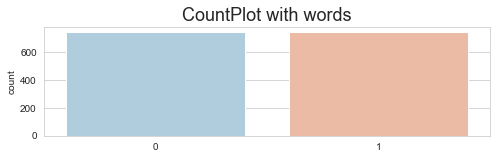

In [79]:
# transform the dataset
X_de, y_de = undersample.fit_resample(X_de, y_de)

#plot with count number of words that people say
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y_de, palette='RdBu_r');

In [80]:
# Scaling in our data points before splitting
X_de = scaler.fit_transform(X_de)

X_de.shape

(1488, 4624)

In [81]:
# reshape our data for cnn input
X_de = X_de.reshape(1488, 68, 68, 1)

X_de.shape

(1488, 68, 68, 1)

### 4.7. Split data and results
<a id="res_de"></a> 

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_de, y_de, test_size = 0.3, random_state = 9)

In [187]:
#call model
model = Cnn_binary(68)

# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 25, 
          verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop])

Epoch 1/25
33/33 [==============================] - 11s 292ms/step - loss: 0.8382 - accuracy: 0.5015 - val_loss: 0.7338 - val_accuracy: 0.4899
Epoch 2/25
33/33 [==============================] - 10s 313ms/step - loss: 0.6571 - accuracy: 0.6337 - val_loss: 0.8206 - val_accuracy: 0.4899
Epoch 3/25
33/33 [==============================] - 9s 282ms/step - loss: 0.6977 - accuracy: 0.5957 - val_loss: 0.8978 - val_accuracy: 0.4899
Epoch 4/25
33/33 [==============================] - 7s 206ms/step - loss: 0.6076 - accuracy: 0.6970 - val_loss: 0.8656 - val_accuracy: 0.4899
Epoch 5/25
33/33 [==============================] - 8s 234ms/step - loss: 0.3125 - accuracy: 0.8758 - val_loss: 0.8412 - val_accuracy: 0.4899
Epoch 6/25
33/33 [==============================] - 7s 204ms/step - loss: 0.2116 - accuracy: 0.9219 - val_loss: 0.8626 - val_accuracy: 0.4899
Epoch 7/25
33/33 [==============================] - 7s 202ms/step - loss: 0.1660 - accuracy: 0.9318 - val_loss: 0.7223 - val_accuracy: 0.4899
Epoc

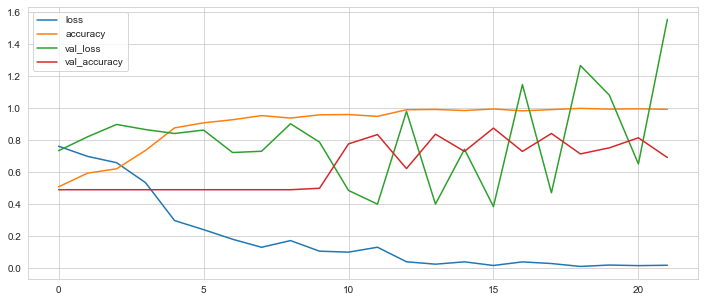

In [188]:
# model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,5));

In [189]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0 )

print("Train loss: ", training_score[0])
print("Validation loss: ", test_score[0])
print("Train accuracy: ", training_score[1])
print("Test accuracy: ", test_score[1])

Train loss:  0.7916265726089478
Validation loss:  1.5541675090789795
Train accuracy:  0.7636887431144714
Test accuracy:  0.6912751793861389


In [190]:
predictions = model.predict_classes(X_test)
print('classification report:\n',classification_report(y_test,predictions, target_names=['female','male']))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

classification report:
               precision    recall  f1-score   support

      female       0.62      1.00      0.77       228
        male       0.99      0.37      0.54       219

    accuracy                           0.69       447
   macro avg       0.81      0.69      0.65       447
weighted avg       0.80      0.69      0.66       447

confusion matrix:
 [[227   1]
 [137  82]]


In [191]:
#call function with scores
pred(y_test,predictions)

Accuracy: 0.691275
Precision: 0.987952
Recall: 0.374429
F1 score: 0.543046
ROC AUC: 0.685022


### 4.8. Create and prepare spectrograms
<a id="spec_de"></a> 

In [ ]:
# create spectrograms
spec_data = spectrogram(0.02245,de.path,de_sil_clips)

# create X and for our model and reshape X for undersampling the gender attribute
X_de_sp = spec_data.reshape(spec_data.shape[0], -1)
y_de_sp = de.gender.to_numpy()

# transform the dataset with undersampling
X_de_sp, y_de_sp = undersample.fit_resample(X_de_sp, y_de_sp)

# plot with count number of words that people say
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y_de_sp, palette='RdBu_r');

In [ ]:
# Scaling in our data points before splitting
X_de_sp = scaler.fit_transform(X_de_sp)

X_de_sp.shape

In [ ]:
# reshape our data for cnn input
X_de_sp = X_de_sp.reshape(X_de_sp[0], 68, 68, 1)

X_de_sp.shape

### 4.9. Run model for spectograms and results
<a id="model_spec_de"></a> 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_de_sp, y_de_sp, test_size = 0.3, random_state = 9)

In [ ]:
#call model
model = Cnn_binary(68)

# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 25, 
          verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop])

In [ ]:
# model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,5));

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0 )

print("Train loss: ", training_score[0])
print("Validation loss: ", test_score[0])
print("Train accuracy: ", training_score[1])
print("Test accuracy: ", test_score[1])

In [ ]:
predictions = model.predict_classes(X_test)
print('classification report:\n',classification_report(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

In [ ]:
#call function with scores
pred(y_test,predictions)

## All languages
<a id="All"></a> 

### 5.1. Summary and concatenation
<a id="sum_con"></a> 

In [88]:
allLanguagesGenderCount['SUM'] = allLanguagesGenderCount.sum(axis=1)

pd.set_option('display.max_columns', None)
display(allLanguagesGenderCount)

es     en     fr    de    SUM
NaN     46242  27274  13723  8513  95752
male    11423  13485   4952  4345  34205
female   5655   4098   1231   802  11786
other     176    442    131    44    793

In [89]:
#concatenation
all_lag=pd.concat([es, en, fr, de]).drop('sentence',axis=1)
#fix dataframe index
all_lag.index=range(len(all_lag))
all_lag

path       age  gender locale
0      common_voice_es_22031610.wav  fourties       0     es
1      common_voice_es_22031616.wav  fourties       0     es
2      common_voice_es_22031617.wav  fourties       0     es
3      common_voice_es_22031620.wav  fourties       0     es
4      common_voice_es_22031623.wav  fourties       0     es
...                             ...       ...     ...    ...
45299  common_voice_de_21916843.wav   fifties       1     de
45300  common_voice_de_21916844.wav   fifties       1     de
45301  common_voice_de_21916845.wav   fifties       1     de
45302  common_voice_de_21916846.wav   fifties       1     de
45303  common_voice_de_23887746.wav   fifties       1     de

[45304 rows x 4 columns]

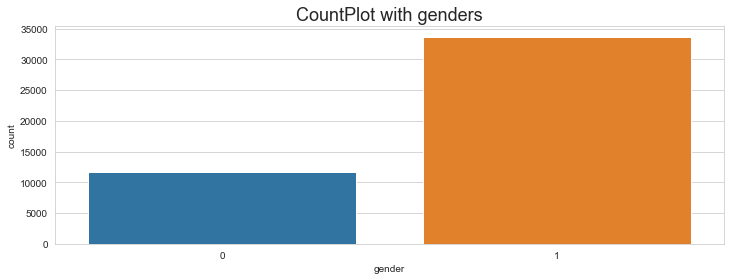

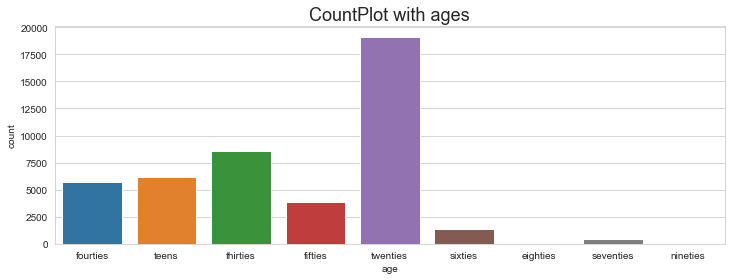

In [90]:
#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=all_lag['gender'],data=all_lag);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=all_lag['age'],data=all_lag);

### 5.2. Create y values and split
<a id="y&split"></a> 

In [130]:
# We create for each language an array with y values
y0 = ['spanish' for i in range(X_es.shape[0])]
y1 = ['english' for i in range(X_en.shape[0])]
y2 = ['french' for i in range(X_fr.shape[0])]
y3 = ['german' for i in range(X_de.shape[0])]

#concatenate all y values
y = np.concatenate((y0, y1, y2, y3), axis=0)
y.shape

(23242,)

In [131]:
# concatenate all X values
X = np.concatenate((X_es,X_en,X_fr,X_de), axis=0)
X.shape

(23242, 68, 68, 1)

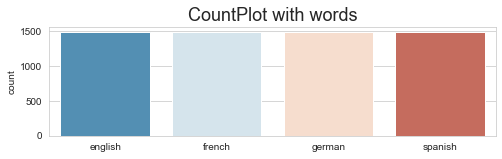

In [132]:
from imblearn.under_sampling import OneSidedSelection
#reshape X for undersampling the locale attribute
X = X.reshape(X.shape[0], -1)

# define the undersampling method
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=X_de.shape[0])
# transform the dataset
X, y = undersample.fit_resample(X, y)

#plot with count number for each locale
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y, palette='RdBu_r');

In [133]:
#MinMax scaling 
X = scaler.fit_transform(X)
# reshape our data for cnn input
X = X.reshape(X.shape[0], 68, 68, 1)
X.shape

(5953, 68, 68, 1)

In [134]:
from keras.utils import np_utils
#label encoder for languages
lb = LabelEncoder()
y = np_utils.to_categorical(lb.fit_transform(y), num_classes=4)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### 5.3. Create model for multiclass in locale
<a id="multi"></a> 

In [136]:
# define model cnn
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(68,68,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# For a multi-class classification problem
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# simple early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
# fit model
model.fit(X_train, y_train, batch_size = 32, epochs = 25, verbose = 1, validation_data = (X_test, y_test), callbacks=[early_stop])

Epoch 1/25
131/131 [==============================] - 20s 140ms/step - loss: 0.1409 - accuracy: 0.9318 - val_loss: 3.3854 - val_accuracy: 0.2413
Epoch 2/25
131/131 [==============================] - 18s 136ms/step - loss: 1.9749e-04 - accuracy: 1.0000 - val_loss: 2.2489 - val_accuracy: 0.2413
Epoch 3/25
131/131 [==============================] - 17s 133ms/step - loss: 9.6139e-07 - accuracy: 1.0000 - val_loss: 0.1787 - val_accuracy: 0.9787
Epoch 4/25
131/131 [==============================] - 24s 184ms/step - loss: 5.8686e-07 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 0.9994
Epoch 5/25
131/131 [==============================] - 24s 185ms/step - loss: 5.0423e-07 - accuracy: 1.0000 - val_loss: 2.2328e-04 - val_accuracy: 1.0000
Epoch 6/25
131/131 [==============================] - 21s 160ms/step - loss: 3.8527e-07 - accuracy: 1.0000 - val_loss: 4.5420e-05 - val_accuracy: 1.0000
Epoch 7/25
131/131 [==============================] - 29s 219ms/step - loss: 3.0246e-07 - accuracy: 1.

In [137]:
# Here we can see parameters and output shapes in each layer
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 66, 66, 16)        160       
_________________________________________________________________
batch_normalization_18 (Batc (None, 66, 66, 16)        64        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 33, 33, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 33, 33, 32)        4640      
_________________________________________________________________
batch_normalization_19 (Batc (None, 33, 33, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)       

### 5.4. Results
<a id="res"></a> 

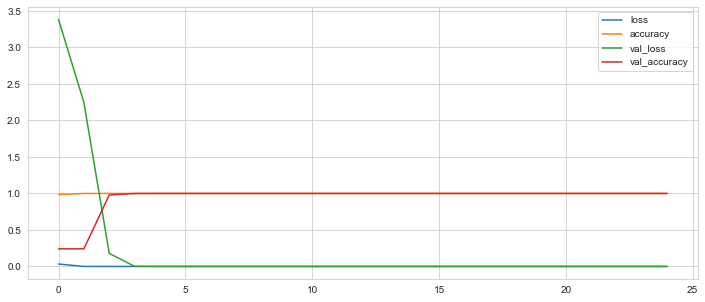

In [138]:
# model loss
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(12,5));

In [139]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0 )

print("Train loss: ", training_score[0])
print("Validation loss: ", test_score[0])
print("Train accuracy: ", training_score[1])
print("Test accuracy: ", test_score[1])

Train loss:  8.893928082898128e-08
Validation loss:  1.5974223060766235e-05
Train accuracy:  1.0
Test accuracy:  1.0


In [161]:
# make predictions and inverse transform to the initial classes
predictions = model.predict_classes(X_test)
predictions = (lb.inverse_transform((predictions)))
# make tests to number labels
actual = y_test.argmax(axis=1)
actual = (lb.inverse_transform((actual)))

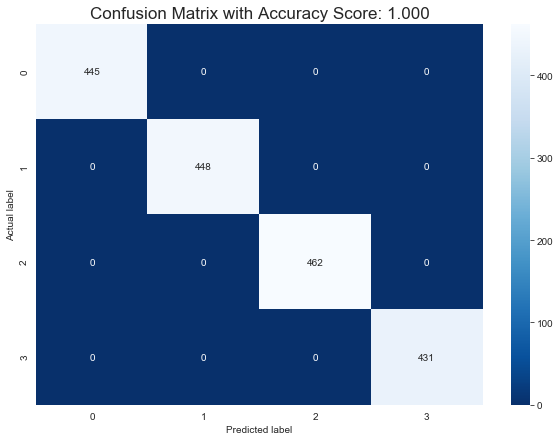

In [162]:
#confusion matrix on heatmap
matrix = confusion_matrix(actual,predictions)
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt='.5g', cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = f'Confusion Matrix with Accuracy Score: {accuracy_score(actual,predictions):.3f}'
plt.title(title, size = 17);

In [117]:
# text with requirements
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
